# Assessment Test: Techmed - Senior Business Analyst - Practice Data - Test case

## Background

You are a business analyst for a pharmaceutical wholesaler with a portfolio of 3000 SKUs, supplying various clients such as:
- General Practitioners (GPs)
- Specialist Doctors
- Pharmacies, and
- Supermarkets  

Each customer segment has different purchasing behaviors and preferences. The GM wants to segment customers correctly to allow better service, price offering, and optimize product portfolio to increase revenue and profitability, focusing on the effectiveness of the product assortment for each customer segment.

## Objectives

- Analyze the data provided and offer insights that can guide strategic decisions.  
- There is no further data available at this time, please carry out data analysis and highlight the assumptions you have to make to reach the conclusions.   
-
  And what other data would help to strengthen the analytics in the future.

## Data Analysis

### Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pip install pandas openpyxl

Matplotlib is building the font cache; this may take a moment.


In [2]:
file_path="Techmed - Senior Business Analyst - Practice Data - Test case.xlsx"
xls=pd.ExcelFile(file_path)
xls.sheet_names

['Background', 'Customer by month', 'Item by month']

### Worksheet: 'Customer by month'
- Seperate Headers
- Seperate dataframe for QTY and Sales
- Convert numeric values + rounding

In [3]:
customer_df=pd.read_excel(xls,sheet_name='Customer by month')
customer_df.head()

,Unnamed: 0,Unnamed: 1,QTY,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,CUSTGROUP,Customer name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct
1,PH-CHAIN,CUST-30001,3269.616964,7499.912,6623.914,5062.162,8204.372,7018.332,6148.304,7586.676,...,198270.06004,169030.38508,173013.98698,182544.10096,194241.34484,159786.18634,182008.55614,165553.672,158386.75068,171310.9609
2,PH-CHAIN,CUST-40001,4302.094236,8154.622,8027.262,8186.064,11874.728,10877.34,10470.186,10779.83,...,185765.81942,143900.25116,125291.57808,164335.39002,127090.75698,106453.58934,130794.32608,132942.63456,128414.38956,125027.44538
3,PH-CHAIN,CUST-50000,1003.172532,3848.262,2837.342,2242.332,7869.654,4655.804,3515.136,3321.708,...,71500.08708,60073.0454,59178.0031,43247.49192,57913.577,61277.8909,75953.33296,51778.0886,64937.98646,69173.8527
4,PH-RETAILS,CUST-60000,306.986952,653.914,556.006,479.988,582.672,552.424,622.472,624.462,...,28799.7576,22538.3221,25973.75462,25077.16808,27075.35892,24633.23888,29567.88964,25697.2481,23139.30608,21911.9895


In [4]:
qty_headers=customer_df.iloc[0,2:24].tolist()
sales_headers=customer_df.iloc[0,24:].tolist()
first_12=qty_headers[:12]
next_10=qty_headers[12:]
col_renamed=[f"{col}_1st" for col in first_12]+[f"{col}_2nd" for col in next_10]
col_renamed

['Jan_1st',
 'Feb_1st',
 'Mar_1st',
 'Apr_1st',
 'May_1st',
 'Jun_1st',
 'Jul_1st',
 'Aug_1st',
 'Sep_1st',
 'Oct_1st',
 'Nov_1st',
 'Dec_1st',
 'Jan_2nd',
 'Feb_2nd',
 'Mar_2nd',
 'Apr_2nd',
 'May_2nd',
 'Jun_2nd',
 'Jul_2nd',
 'Aug_2nd',
 'Sep_2nd',
 'Oct_2nd']

In [5]:
customer_qty=customer_df.iloc[1:,:24]
customer_sales=customer_df.iloc[1:,[0,1] + list(range(24,46))]

customer_qty.columns=['CUSTGROUP','customer_name']+col_renamed
customer_sales.columns=['CUSTGROUP','customer_name']+col_renamed

# change 'object' type to 'float64', then rounding to nearest int
for col in col_renamed:
    customer_qty[col]=pd.to_numeric(customer_qty[col],errors='coerce')
    customer_sales[col]=pd.to_numeric(customer_sales[col],errors='coerce')
    
customer_qty[col_renamed]=customer_qty[col_renamed].round(0).astype(int)
customer_sales[col_renamed]=customer_sales[col_renamed].round(0).astype(int)

In [6]:
customer_qty.head()

,CUSTGROUP,customer_name,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
1,PH-CHAIN,CUST-30001,3270,7500,6624,5062,8204,7018,6148,7587,...,8157,7109,6228,6694,7406,6403,7072,6736,6146,7236
2,PH-CHAIN,CUST-40001,4302,8155,8027,8186,11875,10877,10470,10780,...,14207,10098,8760,11880,9929,8075,9304,9692,9297,8988
3,PH-CHAIN,CUST-50000,1003,3848,2837,2242,7870,4656,3515,3322,...,5077,4291,3840,2486,3756,3475,4805,3125,4294,4395
4,PH-RETAILS,CUST-60000,307,654,556,480,583,552,622,624,...,615,386,544,544,547,484,597,576,484,466
5,PH-RETAILS,CUST-70001,599,1949,2279,1510,1930,1910,1805,2191,...,2192,2372,1737,2072,1818,1565,2148,2006,1977,2215


In [7]:
customer_sales.head()

,CUSTGROUP,customer_name,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
1,PH-CHAIN,CUST-30001,197683,179719,181073,143586,182639,168007,165113,188865,...,198270,169030,173014,182544,194241,159786,182009,165554,158387,171311
2,PH-CHAIN,CUST-40001,153329,125197,127072,125113,157483,152945,153557,159198,...,185766,143900,125292,164335,127091,106454,130794,132943,128414,125027
3,PH-CHAIN,CUST-50000,43838,56142,51104,39866,98498,62623,54925,61105,...,71500,60073,59178,43247,57914,61278,75953,51778,64938,69174
4,PH-RETAILS,CUST-60000,36173,29741,26363,23623,27646,24991,28676,30499,...,28800,22538,25974,25077,27075,24633,29568,25697,23139,21912
5,PH-RETAILS,CUST-70001,18974,25778,28064,18785,21934,27742,23443,28083,...,27916,27674,28135,28057,24011,22649,33587,30021,26038,31810


#### Negative value : Replace with 0

In [8]:
customer_sales.describe()

,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,Sep_1st,Oct_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,...,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,415.513884,416.717518,440.653411,366.846418,477.926637,407.270826,429.030511,440.296538,403.348646,441.442578,...,473.138156,388.208433,394.937607,478.497429,424.288996,390.885499,474.039767,406.045938,402.316764,426.318821
std,4796.845557,4300.125577,4336.388749,3692.976949,4941.255855,4471.646799,4439.301462,4819.966212,4243.504203,4532.284075,...,5292.281450,4359.139383,4207.582337,4928.510037,4524.422090,3972.735325,4558.490246,4161.696091,4112.354941,4285.126646
min,-2.000000,-287.000000,-51.000000,-400.000000,-921.000000,-604.000000,-382.000000,-204.000000,-189.000000,-235.000000,...,-409.000000,-84.000000,-870.000000,-33.000000,-1620.000000,-457.000000,-51.000000,-207.000000,-1064.000000,-976.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,45.000000,55.000000,42.000000,60.000000,46.000000,48.000000,56.000000,47.000000,51.000000,...,60.000000,46.000000,49.000000,59.000000,64.000000,47.000000,66.000000,60.000000,57.000000,57.000000
75%,249.000000,264.000000,284.000000,253.000000,300.000000,245.000000,268.000000,279.000000,248.000000,278.000000,...,299.000000,229.000000,242.000000,271.000000,266.000000,241.000000,312.000000,261.000000,245.000000,278.000000
max,197683.000000,179719.000000,181073.000000,143586.000000,182639.000000,168007.000000,165113.000000,188865.000000,155646.000000,171786.000000,...,198270.000000,169030.000000,173014.000000,182544.000000,194241.000000,159786.000000,182009.000000,165554.000000,158387.000000,171311.000000


In [9]:
neg_customer_sales=customer_sales[(customer_sales.iloc[:,2:]<0).any(axis=1)]
neg_customer_qty=customer_qty[(customer_qty.iloc[:,2:]<0).any(axis=1)]

In [10]:
neg_customer_sales

,CUSTGROUP,customer_name,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
54,OTHERS,CUST-560000,2130,0,1438,1865,481,1242,-21,2103,...,0,482,35,9291,0,749,1075,4374,239,8608
128,CLINIC-SP,CUST-1300001,50,1934,867,2517,354,2523,493,1481,...,2436,1126,34,1419,1683,1013,403,361,358,1867
170,CLINIC-SP,CUST-1720001,684,2173,609,1101,80,620,2408,194,...,1064,914,1392,3009,1098,298,1307,988,923,834
186,CLINIC-SP,CUST-1880000,438,888,1037,-153,411,268,133,1324,...,1350,1448,665,754,2560,567,837,935,267,1727
239,CLINIC-SP,CUST-2410000,0,0,5315,-215,33,467,0,660,...,1526,42,432,1578,854,0,2683,46,800,486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,SUPERMARKET,CUST-27460001,0,0,0,0,0,0,0,0,...,0,8,0,0,47,0,0,1075,-1064,0
2873,CLINIC-DEN,CUST-28750001,0,43,-10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2890,CLINIC-DEN,CUST-28920000,0,0,0,0,0,0,0,0,...,0,0,0,0,6,6,-2,6,0,0
2916,OTHERS,CUST-29180000,0,0,0,0,0,0,0,0,...,0,0,0,36,-36,0,0,0,0,0


In [11]:
neg_customer_qty

,CUSTGROUP,customer_name,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
186,CLINIC-SP,CUST-1880000,3,22,28,-4,27,9,9,18,...,27,35,18,17,38,20,24,25,5,45
263,CLINIC-SP,CUST-2650000,6,31,19,69,52,-29,11,17,...,9,5,0,26,16,4,29,4,10,2
279,CLINIC-SP,CUST-2810000,10,0,12,19,10,20,7,13,...,10,10,30,4,29,16,7,23,4,26
304,CLINIC-GP,CUST-3060001,5,21,24,28,15,14,12,35,...,21,10,27,18,18,25,-5,19,18,1
346,CLINIC-GP,CUST-3480001,17,45,28,28,43,16,-1,44,...,47,23,16,33,18,30,59,21,21,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,OTHERS,CUST-25040000,0,0,0,14,0,0,0,0,...,5,0,0,0,0,4,-4,0,0,0
2596,CLINIC-DEN,CUST-25980001,0,0,4,2,0,0,2,0,...,0,2,1,0,-1,0,0,0,0,0
2621,OTHERS,CUST-26230001,0,0,0,0,0,0,0,0,...,0,8,-5,0,0,0,0,0,0,6
2744,SUPERMARKET,CUST-27460001,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,20,-10,0


In [12]:
neg_count_c_sales=(customer_sales.iloc[:,2:]<0).sum().sum()
neg_count_c_qty=(customer_qty.iloc[:,2:]<0).sum().sum()
print(f"There are {len(neg_customer_sales)} out of total {len(customer_sales)} rows ({round(len(neg_customer_sales)/len(customer_sales)*100,2)}%) and {neg_count_c_sales} negative counts of values in customer monthly sales data.")
print(f"There are {len(neg_customer_qty)} out of total {len(customer_qty)} rows ({round(len(neg_customer_qty)/len(customer_qty)*100,2)}%) and {neg_count_c_qty} negative counts of values in customer monthly qty data.")

There are 95 out of total 2917 rows (3.26%) and 96 negative counts of values in customer monthly sales data.
There are 68 out of total 2917 rows (2.33%) and 69 negative counts of values in customer monthly qty data.


In [13]:
# Replace with 0
customer_sales.iloc[:,2:]=customer_sales.iloc[:,2:].mask(customer_sales.iloc[:,2:]<0,0)
customer_qty.iloc[:,2:]=customer_qty.iloc[:,2:].mask(customer_qty.iloc[:,2:]<0,0)

- **Replace negatives with 0** for safer cleaning strategy as there is only **3.26% and 2.33%** will be affected.

### Worksheet : 'Item by month'
- Seperate Headers
- Seperate dataframe for QTY and Sales
- Convert numeric values + rounding

In [14]:
item_df=pd.read_excel(xls,sheet_name='Item by month')
item_df.head()

,Unnamed: 0,QTY,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,ITEM ID,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct
1,SKU-30000,566.752,417.104,448.944,331.534,386.06,483.172,526.952,475.212,394.418,...,22177.2764,14850.20784,19637.99262,20879.4979,17390.22394,15736.06032,20052.22704,13212.99902,16369.85542,16365.00778
2,SKU-40000,61.69,63.68,74.028,67.262,79.6,63.282,57.312,91.54,122.584,...,13700.38186,11456.39418,16616.84228,19558.22944,25855.00336,14469.15468,21392.59154,19381.11944,17875.73618,23490.83958
3,SKU-50000,285.764,286.958,285.764,209.348,294.918,237.208,298.898,259.098,255.516,...,14762.417,10517.9062,16725.0147,14631.10486,17018.52776,14113.47004,15428.09588,13263.32214,12399.49498,13329.76824
4,SKU-60000,1558.966,2290.888,1405.338,579.886,3293.848,2659.834,968.334,1772.294,1672.396,...,21226.41858,12944.0346,18143.89664,13827.47918,16086.7222,16330.42954,11383.0786,19642.52584,14319.13654,15461.8622


In [15]:
item_qty=item_df.iloc[1:,:23]
item_sales=item_df.iloc[1:,[0] + list(range(23,45))]

item_qty.columns=['item_id']+col_renamed
item_sales.columns=['item_id']+col_renamed

# change 'object' type to 'float64', then rounding to nearest int
for col in col_renamed:
    item_qty[col]=pd.to_numeric(item_qty[col],errors='coerce')
    item_sales[col]=pd.to_numeric(item_sales[col],errors='coerce')
    
item_qty[col_renamed]=item_qty[col_renamed].round(0).astype(int)
item_sales[col_renamed]=item_sales[col_renamed].round(0).astype(int)

In [16]:
item_qty.head()

,item_id,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,Sep_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
1,SKU-30000,567,417,449,332,386,483,527,475,394,...,523,354,464,489,410,374,472,312,384,387
2,SKU-40000,62,64,74,67,80,63,57,92,123,...,78,66,96,113,150,86,131,117,109,148
3,SKU-50000,286,287,286,209,295,237,299,259,256,...,227,162,258,225,261,217,239,203,191,206
4,SKU-60000,1559,2291,1405,580,3294,2660,968,1772,1672,...,2491,1528,2127,1628,1896,1921,1322,2299,1678,1817
5,SKU-70001,1589,2340,5,0,4239,3219,2197,1439,1212,...,2742,2998,1469,1286,1552,1760,2205,1184,1654,1653


In [17]:
item_sales.head()

,item_id,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,Sep_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
1,SKU-30000,23968,17607,18927,13979,16277,20361,22389,20173,16703,...,22177,14850,19638,20879,17390,15736,20052,13213,16370,16365
2,SKU-40000,11584,11793,13720,12634,14665,11684,10763,16906,21590,...,13700,11456,16617,19558,25855,14469,21393,19381,17876,23491
3,SKU-50000,18717,18790,18626,13723,19168,15382,19441,16904,16489,...,14762,10518,16725,14631,17019,14113,15428,13263,12399,13330
4,SKU-60000,13014,19424,11855,4817,28025,22525,8089,14969,14203,...,21226,12944,18144,13827,16087,16330,11383,19643,14319,15462
5,SKU-70001,12962,19222,39,0,34908,26563,18149,11795,9930,...,18688,24750,12117,10539,12744,14480,18302,9694,13732,13677


#### Negative value : Replace with 0

In [18]:
item_sales.describe()

,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,Sep_1st,Oct_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
count,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,...,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000
mean,434.944583,435.834103,461.169805,384.691297,499.665364,424.759503,448.678863,463.288455,423.040497,463.968384,...,495.602487,405.980817,415.428064,499.847957,444.401066,409.451510,499.527176,425.415275,421.343517,446.893428
std,1215.725120,1294.483700,1290.847439,1032.794911,1581.426431,1355.027946,1403.477974,1347.051576,1245.161849,1325.596236,...,1448.632127,1223.473096,1237.629574,1945.429509,1336.457456,1202.886458,1716.604009,1268.882757,1338.967571,1460.910643
min,-19.000000,-165.000000,-64.000000,-137.000000,-217.000000,-633.000000,-1257.000000,-251.000000,-906.000000,-511.000000,...,-680.000000,-66.000000,-212.000000,-49.000000,-1471.000000,-192.000000,-1379.000000,-150.000000,-30.000000,-494.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,47.000000,48.000000,41.000000,49.000000,43.000000,47.000000,55.000000,50.000000,54.000000,...,59.000000,42.000000,44.000000,54.000000,55.000000,44.000000,62.000000,44.000000,47.000000,49.000000
75%,337.000000,318.500000,351.000000,310.000000,358.000000,322.000000,330.500000,350.500000,307.000000,345.500000,...,368.500000,282.000000,306.000000,341.000000,334.000000,309.000000,367.000000,322.000000,313.000000,303.000000
max,23968.000000,19424.000000,18927.000000,14146.000000,34908.000000,26563.000000,29906.000000,20173.000000,21590.000000,22258.000000,...,22177.000000,24750.000000,19638.000000,62586.000000,25855.000000,16330.000000,53862.000000,24409.000000,37551.000000,37551.000000


In [19]:
neg_item_sales=item_sales[(item_sales.iloc[:,1:]<0).any(axis=1)]
neg_item_qty=item_qty[(item_qty.iloc[:,1:]<0).any(axis=1)]

In [20]:
neg_item_sales

,item_id,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,Sep_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
24,SKU-260001,4630,1604,5807,387,5460,4204,2372,-38,13009,...,9309,11742,3659,6043,7032,5323,6252,5414,5274,7279
66,SKU-680001,1909,3564,-1,41,6462,1865,4375,3950,3221,...,3888,2954,3613,3628,3792,3318,4550,3052,3510,4868
77,SKU-790000,5763,3710,7249,5228,5546,5192,5248,8980,5102,...,4722,0,0,0,0,0,0,0,0,0
90,SKU-920001,2742,3881,2677,3893,2352,2367,3094,4452,2633,...,-680,3030,989,5036,-1471,1924,3191,3528,2137,1863
161,SKU-1630001,486,0,0,200,7837,1278,1222,1454,1080,...,4701,3248,2260,2070,1807,1977,2518,1684,1856,2682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,SKU-28130000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2812,SKU-28140000,0,0,0,0,0,0,0,0,0,...,0,0,0,-4,0,0,0,0,-4,0
2813,SKU-28150000,-19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2814,SKU-28160001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-14,0,0,0


In [21]:
neg_item_qty

,item_id,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,Sep_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
24,SKU-260001,577,199,718,36,662,518,279,-5,1543,...,1107,1397,434,718,837,617,694,605,589,813
66,SKU-680001,238,449,-1,5,791,232,538,478,393,...,471,358,439,426,453,397,565,370,422,589
77,SKU-790000,324,209,411,294,314,294,297,510,288,...,269,0,0,0,0,0,0,0,0,0
90,SKU-920001,79,110,76,110,66,67,88,125,74,...,-20,86,28,143,-42,55,91,100,61,53
451,SKU-4530000,128,82,101,124,113,87,77,146,107,...,112,98,71,47,0,0,-4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,SKU-26930000,0,0,0,2,0,0,0,0,1,...,1,0,0,2,-2,0,0,1,0,1
2809,SKU-28110000,0,0,3,0,-3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2813,SKU-28150000,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2814,SKU-28160001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-3,0,0,0


In [22]:
neg_count_i_sales=(item_sales.iloc[:,1:]<0).sum().sum()
neg_count_i_qty=(item_qty.iloc[:,1:]<0).sum().sum()
print(f"There are {len(neg_item_sales)} out of total {len(item_sales)} rows ({round(len(neg_item_sales)/len(item_sales)*100,2)}%) and {neg_count_i_sales} negative counts of values in item monthly sales data.")
print(f"There are {len(neg_item_qty)} out of total {len(item_qty)} rows ({round(len(neg_item_qty)/len(item_qty)*100,2)}%) and {neg_count_i_qty} negative counts of values in item monthly qty data.")

There are 113 out of total 2815 rows (4.01%) and 134 negative counts of values in item monthly sales data.
There are 72 out of total 2815 rows (2.56%) and 89 negative counts of values in item monthly qty data.


In [23]:
# Replace with 0
item_sales.iloc[:,1:]=item_sales.iloc[:,1:].mask(item_sales.iloc[:,1:]<0,0)
item_qty.iloc[:,1:]=item_qty.iloc[:,1:].mask(item_qty.iloc[:,1:]<0,0)

- **Replace negatives with zero** for safer cleaning strategy as there is only 3.98% and 2.52% will be affected.

## KPI
- Top 10 customers by total Sales
- Top 10 items by total Sales
- Monthly Trend: Total Sales per Month (from customer data)
- Monthly Trend: Total customer Sales breakdown

### 1.Top 10 customers / group by total Sales / Qty

In [24]:
customer_sales.describe(include=['object'])

,CUSTGROUP,customer_name
count,2917,2917
unique,10,2917
top,CLINIC-SP,CUST-30001
freq,1137,1


In [25]:
customer_sales["CUSTGROUP"].value_counts()

CUSTGROUP
CLINIC-SP      1137
CLINIC-GP       984
CLINIC-DEN      338
GROUP-GP        290
OTHERS          107
PH-RETAILS       19
HOSP-PTE         13
CORPORATES       13
SUPERMARKET      12
PH-CHAIN          4
Name: count, dtype: int64

- There has **10 customer groups**, **2917 customers**

In [26]:
#Top 10 customers by total Sales
top_customers=customer_sales.copy()
top_customers["Total_Sales"]=top_customers.iloc[:,2:].sum(axis=1)
top_10_customers=top_customers.sort_values("Total_Sales",ascending=False).head(10)[["CUSTGROUP","customer_name","Total_Sales"]]
top_10_customers

,CUSTGROUP,customer_name,Total_Sales
1,PH-CHAIN,CUST-30001,3815299
2,PH-CHAIN,CUST-40001,3125437
3,PH-CHAIN,CUST-50000,1295154
4,PH-RETAILS,CUST-60000,584381
5,PH-RETAILS,CUST-70001,583909
6,CLINIC-SP,CUST-80000,245927
7,PH-RETAILS,CUST-90001,242232
8,OTHERS,CUST-100001,212808
9,CLINIC-GP,CUST-110001,175186
10,GROUP-GP,CUST-120000,149236


In [27]:
top_customers['Total_Sales'].sum()

np.int64(27314474)

In [28]:
#Top customers by total Sales groupby Custgroup
top_customers_group=customer_sales.copy()
top_customers_group["Total_Sales"]=top_customers_group.iloc[:,2:].sum(axis=1)
top_customers_group=top_customers_group.groupby(["CUSTGROUP"])["Total_Sales"].sum()
top_customers_group=top_customers_group.sort_values(ascending=False)
top_customers_group

CUSTGROUP
PH-CHAIN       8236508
CLINIC-SP      7417240
CLINIC-GP      6163186
PH-RETAILS     1788163
GROUP-GP       1728313
OTHERS          840810
HOSP-PTE        637907
CLINIC-DEN      351406
SUPERMARKET     114121
CORPORATES       36820
Name: Total_Sales, dtype: int64

In [29]:
#Top 10 customers by total qty
top_customers_qty=customer_qty.copy()
top_customers_qty["Total_Qty"]=top_customers_qty.iloc[:,2:].sum(axis=1)
top_10_customers_qty=top_customers_qty.sort_values("Total_Qty",ascending=False).head(10)[["CUSTGROUP","customer_name","Total_Qty"]]
top_10_customers_qty

,CUSTGROUP,customer_name,Total_Qty
2,PH-CHAIN,CUST-40001,217255
1,PH-CHAIN,CUST-30001,145967
3,PH-CHAIN,CUST-50000,82454
5,PH-RETAILS,CUST-70001,42907
4,PH-RETAILS,CUST-60000,11797
47,PH-RETAILS,CUST-490000,6684
138,OTHERS,CUST-1400000,6572
33,PH-RETAILS,CUST-350000,6445
7,PH-RETAILS,CUST-90001,5880
13,HOSP-PTE,CUST-150001,5549


In [30]:
#Top customers by total Qty groupby Custgroup
top_customers_group_qty=customer_qty.copy()
top_customers_group_qty["Total_Sales"]=top_customers_group_qty.iloc[:,2:].sum(axis=1)
top_customers_group_qty=top_customers_group_qty.groupby(["CUSTGROUP"])["Total_Sales"].sum()
top_customers_group_qty=top_customers_group_qty.sort_values(ascending=False)
top_customers_group_qty

CUSTGROUP
PH-CHAIN       445753
CLINIC-GP      271171
CLINIC-SP      270544
PH-RETAILS      92379
GROUP-GP        76313
OTHERS          40187
HOSP-PTE        20194
CLINIC-DEN      16719
SUPERMARKET      4405
CORPORATES       1130
Name: Total_Sales, dtype: int64

Conclusion:
- **PH-CHAIN** has 4 loyalty customer (the least customer), but has the **Top 1 total Sales** and **Top 1 total Qty**.
- **CLINIC-SP** has 1137 customer (the most customer), and has the **Top 2 total Sales** and **Top 3 total Qty**.
- **CLINIC-GP** has 984 customer (the SECOND most customer), and has the **Top 3 total Sales** and **Top 2 total Qty**.
- **PH-RETAILS** has 19 loyalty customer (less customer), but has the **Top 4 total Sales** and **Top 4 total Qty**.

### 2.Top 10 items by total Sales / Qty

In [31]:
item_sales.describe(include=['object'])

,item_id
count,2815
unique,2815
top,SKU-30000
freq,1


- There has **2815 SKUs**

In [32]:
#Top 10 items by total Sales
top_items=item_sales.copy()
top_items["Total_Sales"]=top_items.iloc[:,1:].sum(axis=1)
top_10_items=top_items.sort_values("Total_Sales",ascending=False).head(10)[["item_id","Total_Sales"]]
top_10_items

,item_id,Total_Sales
1,SKU-30000,411313
2,SKU-40000,364103
3,SKU-50000,348324
4,SKU-60000,330021
5,SKU-70001,328464
6,SKU-80000,313134
7,SKU-90000,291900
8,SKU-100000,284838
9,SKU-110000,275493
10,SKU-120001,261608


In [33]:
#Top 10 items by total qty
top_items_qty=item_qty.copy()
top_items_qty["Total_Qty"]=top_items_qty.iloc[:,1:].sum(axis=1)
top_10_items_qty=top_items_qty.sort_values("Total_Qty",ascending=False).head(10)[["item_id","Total_Qty"]]
top_10_items_qty

,item_id,Total_Qty
5,SKU-70001,40353
4,SKU-60000,38875
8,SKU-100000,37040
20,SKU-220000,17625
24,SKU-260001,15219
238,SKU-2400001,13838
25,SKU-270001,13495
1,SKU-30000,9711
132,SKU-1340001,9503
320,SKU-3220001,9402


In [34]:
# Underperforming SKUs
underperforming_items=top_items[top_items["Total_Sales"]==0]
underperforming_items_qty=top_items_qty[top_items_qty["Total_Qty"]==0]
len(underperforming_items),len(underperforming_items_qty)

(14, 133)

#### Pareto Chart: Top 20% SKUs contributes to 80% of total sales
- A small number of products ("the vital few") drive the majority of sales/revenue
- The remaining 80% of SKUs ("the trivial many") contributes to only 20% of sales

In [35]:
pareto_df=top_items[["item_id","Total_Sales"]].reset_index(drop=True)
pareto_df["Cumulative_sales"]=pareto_df["Total_Sales"].cumsum()
pareto_df["Cumulative_%"]=round(pareto_df["Cumulative_sales"]/(pareto_df["Total_Sales"].sum())*100,2)
pareto_df["Pareto_Group"]=pareto_df["Cumulative_%"].apply(lambda x:'Top 80%' if x<=80 else 'Bottom 20%')
pareto_df

,item_id,Total_Sales,Cumulative_sales,Cumulative_%,Pareto_Group
0,SKU-30000,411313,411313,1.49,Top 80%
1,SKU-40000,364103,775416,2.81,Top 80%
2,SKU-50000,348324,1123740,4.07,Top 80%
3,SKU-60000,330021,1453761,5.26,Top 80%
4,SKU-70001,328464,1782225,6.45,Top 80%
...,...,...,...,...,...
2810,SKU-28130000,0,27626799,100.00,Bottom 20%
2811,SKU-28140000,0,27626799,100.00,Bottom 20%
2812,SKU-28150000,0,27626799,100.00,Bottom 20%
2813,SKU-28160001,0,27626799,100.00,Bottom 20%


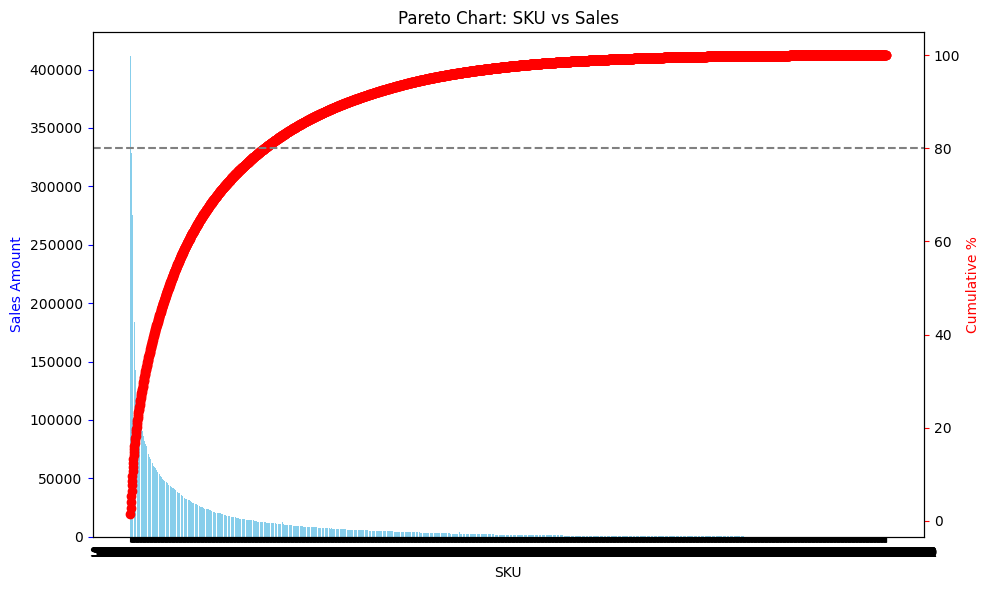

In [36]:
#Pareto chart
fig,ax1=plt.subplots(figsize=(10,6))
ax1.bar(pareto_df["item_id"],pareto_df["Total_Sales"],color='skyblue')
ax1.set_ylabel('Sales Amount',color='blue')
ax1.tick_params('y',color='blue')
ax1.set_xlabel('SKU')

ax2=ax1.twinx()
ax2.plot(pareto_df["item_id"],pareto_df["Cumulative_%"],color='red',marker='o',linestyle='-')
ax2.set_ylabel('Cumulative %',color='red')
ax2.tick_params('y',color='red')
ax2.axhline(80,color='gray',linestyle='--')

plt.title('Pareto Chart: SKU vs Sales')
plt.tight_layout()
plt.show()

In [37]:
top_80_pareto_df=pareto_df[pareto_df["Cumulative_%"]<=80]
print("Top SKUs contributing to 80% of sales:")
top_80_pareto_df

Top SKUs contributing to 80% of sales:


,item_id,Total_Sales,Cumulative_sales,Cumulative_%,Pareto_Group
0,SKU-30000,411313,411313,1.49,Top 80%
1,SKU-40000,364103,775416,2.81,Top 80%
2,SKU-50000,348324,1123740,4.07,Top 80%
3,SKU-60000,330021,1453761,5.26,Top 80%
4,SKU-70001,328464,1782225,6.45,Top 80%
...,...,...,...,...,...
494,SKU-4970001,12449,22041743,79.78,Top 80%
495,SKU-4980000,12444,22054187,79.83,Top 80%
496,SKU-4990000,12366,22066553,79.87,Top 80%
497,SKU-5000000,12581,22079134,79.92,Top 80%


In [38]:
round(len(top_80_pareto_df)/len(pareto_df)*100,2)

17.73

- Top **17.73% SKUs** contributing to **80% of sales**

### 3.Monthly Trend: Total Sales per Month (from customer data)

In [39]:
#total customer Sales per Month 
monthly_sales_trend=customer_sales.iloc[:,2:].sum().reset_index()
monthly_sales_trend.columns=["Month","Total_Sales"]
monthly_sales_trend

#total customer qty per Month 
monthly_qty_trend=customer_qty.iloc[:,2:].sum().reset_index()
monthly_qty_trend.columns=["Month","Total_Qty"]
monthly_qty_trend

#total item qty per Month 
monthly_item_qty_trend=item_qty.iloc[:,1:].sum().reset_index()
monthly_item_qty_trend.columns=["Month","Total_Item_Qty"]
monthly_item_qty_trend

#total item Sales per Month 
monthly_item_sales_trend=item_sales.iloc[:,1:].sum().reset_index()
monthly_item_sales_trend.columns=["Month","Total_Item_Sales"]
monthly_item_sales_trend

monthly_trend=monthly_sales_trend.merge(monthly_qty_trend,on=["Month"],how='left')
monthly_trend=monthly_trend.merge(monthly_item_qty_trend,on=["Month"],how='left')
monthly_trend=monthly_trend.merge(monthly_item_sales_trend,on=["Month"],how='left')
monthly_trend

,Month,Total_Sales,Total_Qty,Total_Item_Qty,Total_Item_Sales
0,Jan_1st,1212056,23565,59768,1224388
1,Feb_1st,1216452,57311,57710,1227092
2,Mar_1st,1285477,60147,60709,1298272
3,Apr_1st,1070908,51210,51719,1083097
4,May_1st,1395085,69826,70432,1407423
5,Jun_1st,1189106,56272,56685,1196424
6,Jul_1st,1252226,56754,57244,1264728
7,Aug_1st,1284705,59996,61083,1304672
8,Sep_1st,1176915,57916,58643,1192428
9,Oct_1st,1288016,59242,60420,1306707


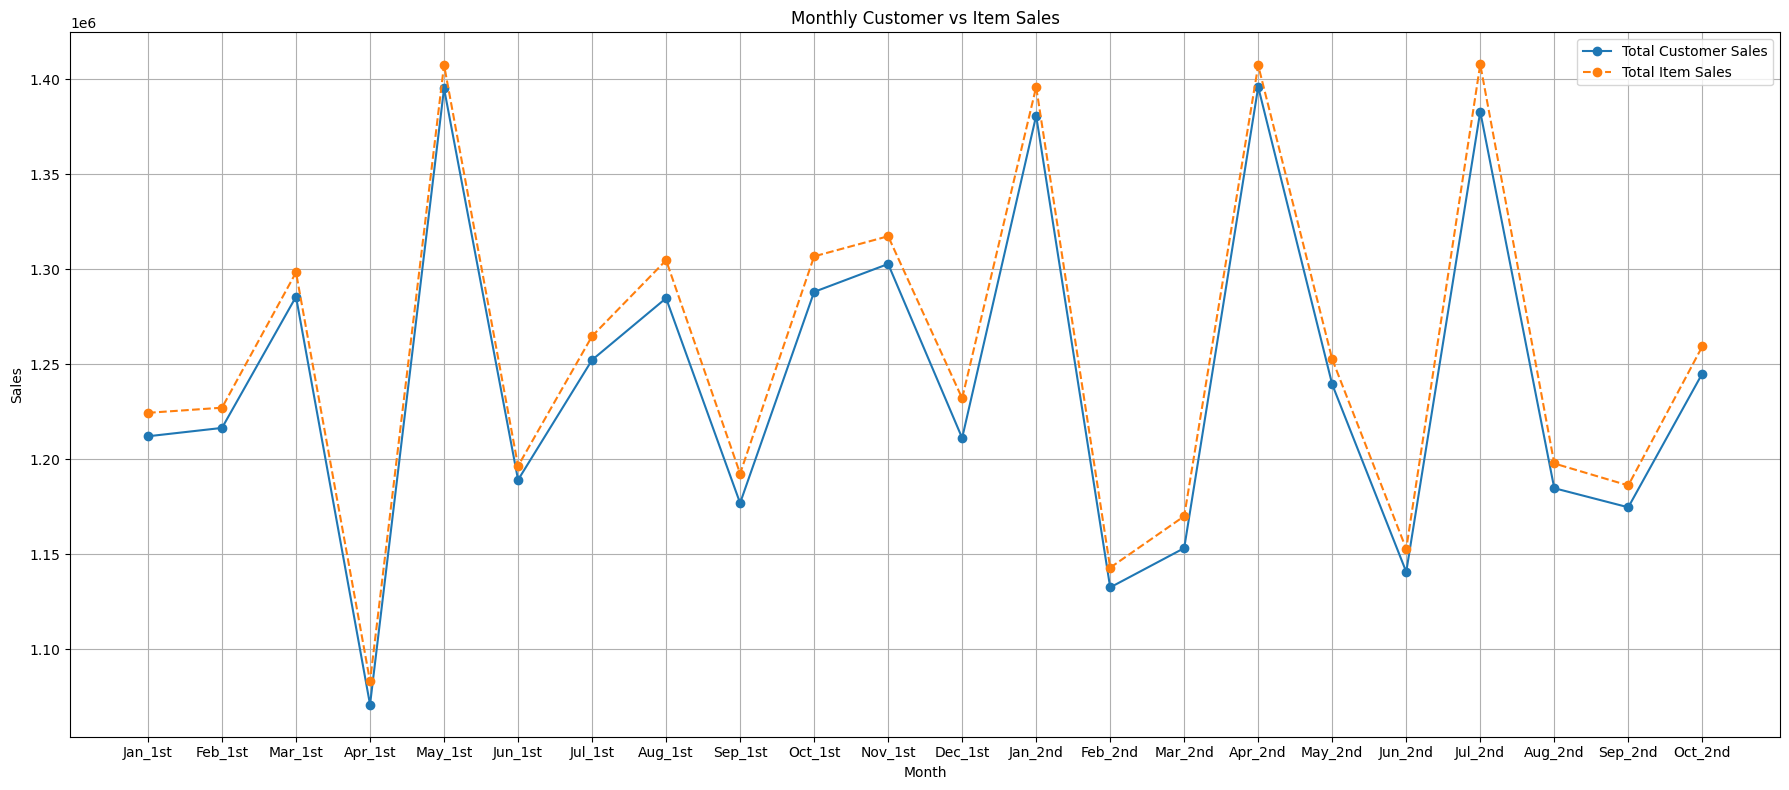

In [40]:
plt.figure(figsize=(18,8))
plt.plot(monthly_sales_trend['Month'],monthly_sales_trend["Total_Sales"],label="Total Customer Sales",marker='o')
plt.plot(monthly_item_sales_trend['Month'],monthly_item_sales_trend["Total_Item_Sales"],label="Total Item Sales",marker='o',linestyle="--")
plt.title(f"Monthly Customer vs Item Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.xticks()
plt.tight_layout()
plt.show()    

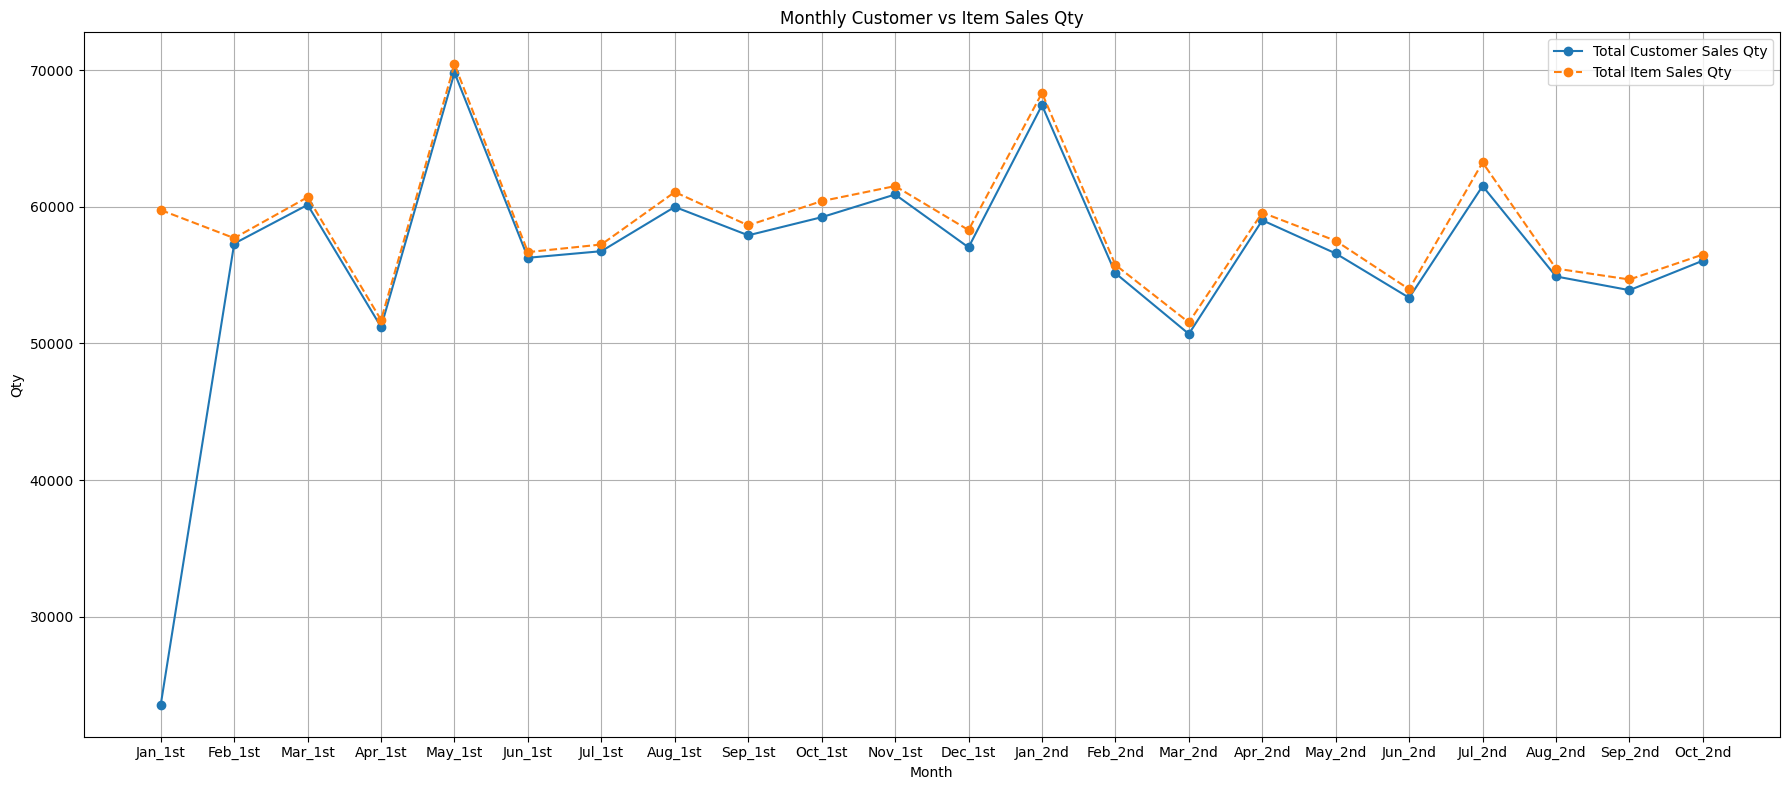

In [41]:
plt.figure(figsize=(18,8))
plt.plot(monthly_qty_trend['Month'],monthly_qty_trend["Total_Qty"],label="Total Customer Sales Qty",marker='o')
plt.plot(monthly_item_qty_trend['Month'],monthly_item_qty_trend["Total_Item_Qty"],label="Total Item Sales Qty",marker='o',linestyle="--")
plt.title(f"Monthly Customer vs Item Sales Qty")
plt.xlabel("Month")
plt.ylabel("Qty")
plt.legend()
plt.grid()
plt.xticks()
plt.tight_layout()
plt.show()    

Conclusion:
- Customer data for **Qty** part by **Jan_1st** has **missing or inaccurate record**

### Monthly Trend: TOP 5 customer Sales breakdown

In [42]:
top_5_customers=top_customers.sort_values("Total_Sales",ascending=False).head(5)[["CUSTGROUP","customer_name","Total_Sales"]]
top_5_customers_sales=customer_sales[customer_sales["customer_name"].isin(top_5_customers["customer_name"])]
top_5_customers_sales_trend=top_5_customers_sales.set_index("customer_name").iloc[:,1:].T
top_5_customers_sales_trend                             

customer_name,CUST-30001,CUST-40001,CUST-50000,CUST-60000,CUST-70001
Jan_1st,197683,153329,43838,36173,18974
Feb_1st,179719,125197,56142,29741,25778
Mar_1st,181073,127072,51104,26363,28064
Apr_1st,143586,125113,39866,23623,18785
May_1st,182639,157483,98498,27646,21934
Jun_1st,168007,152945,62623,24991,27742
Jul_1st,165113,153557,54925,28676,23443
Aug_1st,188865,159198,61105,30499,28083
Sep_1st,155646,154471,44266,20747,28467
Oct_1st,171786,154571,58731,25859,28913


## Other data would help to Strengthen anaytics in the future

- **Cost of Goods sold**: enable gross margin analysis
- **SKU price**: calculate price elasticity / price sensitive analysis
- **SKU category**: for segment-specific assortment planning, link top SKUs with customer type to guide assortment by segment
- **Customer Purchase channel** (online/direct sales/...): help with analysis purchasing behaviour
- **Discounts, promotions, marketing campaigns, events time**: need to understand the seasonality fluctuations

- **Linked SKUs to Customer data**: understand SKUs contribution per customer segment
- **SKU Rationalization**: highlight 0 or Negative sales/qty, flag for review/discontinuation

## Data used for Tableau Chart

In [43]:
customer_sales

,CUSTGROUP,customer_name,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
1,PH-CHAIN,CUST-30001,197683,179719,181073,143586,182639,168007,165113,188865,...,198270,169030,173014,182544,194241,159786,182009,165554,158387,171311
2,PH-CHAIN,CUST-40001,153329,125197,127072,125113,157483,152945,153557,159198,...,185766,143900,125292,164335,127091,106454,130794,132943,128414,125027
3,PH-CHAIN,CUST-50000,43838,56142,51104,39866,98498,62623,54925,61105,...,71500,60073,59178,43247,57914,61278,75953,51778,64938,69174
4,PH-RETAILS,CUST-60000,36173,29741,26363,23623,27646,24991,28676,30499,...,28800,22538,25974,25077,27075,24633,29568,25697,23139,21912
5,PH-RETAILS,CUST-70001,18974,25778,28064,18785,21934,27742,23443,28083,...,27916,27674,28135,28057,24011,22649,33587,30021,26038,31810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,OTHERS,CUST-29150000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2914,CLINIC-SP,CUST-29160001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2915,CLINIC-SP,CUST-29170001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2916,OTHERS,CUST-29180000,0,0,0,0,0,0,0,0,...,0,0,0,36,0,0,0,0,0,0


In [44]:
customer_qty

,CUSTGROUP,customer_name,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
1,PH-CHAIN,CUST-30001,3270,7500,6624,5062,8204,7018,6148,7587,...,8157,7109,6228,6694,7406,6403,7072,6736,6146,7236
2,PH-CHAIN,CUST-40001,4302,8155,8027,8186,11875,10877,10470,10780,...,14207,10098,8760,11880,9929,8075,9304,9692,9297,8988
3,PH-CHAIN,CUST-50000,1003,3848,2837,2242,7870,4656,3515,3322,...,5077,4291,3840,2486,3756,3475,4805,3125,4294,4395
4,PH-RETAILS,CUST-60000,307,654,556,480,583,552,622,624,...,615,386,544,544,547,484,597,576,484,466
5,PH-RETAILS,CUST-70001,599,1949,2279,1510,1930,1910,1805,2191,...,2192,2372,1737,2072,1818,1565,2148,2006,1977,2215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,OTHERS,CUST-29150000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2914,CLINIC-SP,CUST-29160001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2915,CLINIC-SP,CUST-29170001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2916,OTHERS,CUST-29180000,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0


In [45]:
qty_cols=customer_qty.iloc[:,2:]
qty_long=customer_qty.melt(id_vars=['CUSTGROUP','customer_name'],value_vars=qty_cols,var_name='Month',value_name='Qty')
qty_long['Year']=qty_long['Month'].str.extract(r'_(1st|2nd)$')
qty_long['Month']=qty_long['Month'].str.extract(r'(\w+)_')
qty_long

sales_cols=customer_sales.iloc[:,2:]
sales_long=customer_sales.melt(id_vars=['CUSTGROUP','customer_name'],value_vars=sales_cols,var_name='Month',value_name='Sales')
sales_long['Year']=sales_long['Month'].str.extract(r'_(1st|2nd)$')
sales_long['Month']=sales_long['Month'].str.extract(r'(\w+)_')
sales_long

customer_merged=qty_long.merge(sales_long,on=['CUSTGROUP','customer_name','Month','Year'],how='left')
cols=customer_merged.columns.tolist()
cols[3],cols[4]=cols[4],cols[3]
customer_merged=customer_merged[cols]
customer_merged['Year']=customer_merged['Year'].map({'1st':2023,'2nd':2024})
customer_merged



,CUSTGROUP,customer_name,Month,Year,Qty,Sales
0,PH-CHAIN,CUST-30001,Jan,2023,3270,197683
1,PH-CHAIN,CUST-40001,Jan,2023,4302,153329
2,PH-CHAIN,CUST-50000,Jan,2023,1003,43838
3,PH-RETAILS,CUST-60000,Jan,2023,307,36173
4,PH-RETAILS,CUST-70001,Jan,2023,599,18974
...,...,...,...,...,...,...
64169,OTHERS,CUST-29150000,Oct,2024,0,0
64170,CLINIC-SP,CUST-29160001,Oct,2024,0,0
64171,CLINIC-SP,CUST-29170001,Oct,2024,0,0
64172,OTHERS,CUST-29180000,Oct,2024,0,0


In [46]:
item_sales

,item_id,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,Sep_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
1,SKU-30000,23968,17607,18927,13979,16277,20361,22389,20173,16703,...,22177,14850,19638,20879,17390,15736,20052,13213,16370,16365
2,SKU-40000,11584,11793,13720,12634,14665,11684,10763,16906,21590,...,13700,11456,16617,19558,25855,14469,21393,19381,17876,23491
3,SKU-50000,18717,18790,18626,13723,19168,15382,19441,16904,16489,...,14762,10518,16725,14631,17019,14113,15428,13263,12399,13330
4,SKU-60000,13014,19424,11855,4817,28025,22525,8089,14969,14203,...,21226,12944,18144,13827,16087,16330,11383,19643,14319,15462
5,SKU-70001,12962,19222,39,0,34908,26563,18149,11795,9930,...,18688,24750,12117,10539,12744,14480,18302,9694,13732,13677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,SKU-28130000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2812,SKU-28140000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2813,SKU-28150000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2814,SKU-28160001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
item_qty

,item_id,Jan_1st,Feb_1st,Mar_1st,Apr_1st,May_1st,Jun_1st,Jul_1st,Aug_1st,Sep_1st,...,Jan_2nd,Feb_2nd,Mar_2nd,Apr_2nd,May_2nd,Jun_2nd,Jul_2nd,Aug_2nd,Sep_2nd,Oct_2nd
1,SKU-30000,567,417,449,332,386,483,527,475,394,...,523,354,464,489,410,374,472,312,384,387
2,SKU-40000,62,64,74,67,80,63,57,92,123,...,78,66,96,113,150,86,131,117,109,148
3,SKU-50000,286,287,286,209,295,237,299,259,256,...,227,162,258,225,261,217,239,203,191,206
4,SKU-60000,1559,2291,1405,580,3294,2660,968,1772,1672,...,2491,1528,2127,1628,1896,1921,1322,2299,1678,1817
5,SKU-70001,1589,2340,5,0,4239,3219,2197,1439,1212,...,2742,2998,1469,1286,1552,1760,2205,1184,1654,1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,SKU-28130000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2812,SKU-28140000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2813,SKU-28150000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2814,SKU-28160001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
i_qty_cols=item_qty.iloc[:,1:]
i_qty_long=item_qty.melt(id_vars=['item_id'],value_vars=i_qty_cols,var_name='Month',value_name='Qty')
i_qty_long['Year']=i_qty_long['Month'].str.extract(r'_(1st|2nd)$')
i_qty_long['Month']=i_qty_long['Month'].str.extract(r'(\w+)_')
i_qty_long

i_sales_cols=item_sales.iloc[:,1:]
i_sales_long=item_sales.melt(id_vars=['item_id'],value_vars=i_sales_cols,var_name='Month',value_name='Sales')
i_sales_long['Year']=i_sales_long['Month'].str.extract(r'_(1st|2nd)$')
i_sales_long['Month']=i_sales_long['Month'].str.extract(r'(\w+)_')
i_sales_long

item_merged=i_qty_long.merge(i_sales_long,on=['item_id','Month','Year'],how='left')
cols=item_merged.columns.tolist()
cols[2],cols[3]=cols[3],cols[2]
item_merged=item_merged[cols]
item_merged['Year']=item_merged['Year'].map({'1st':2023,'2nd':2024})
item_merged

,item_id,Month,Year,Qty,Sales
0,SKU-30000,Jan,2023,567,23968
1,SKU-40000,Jan,2023,62,11584
2,SKU-50000,Jan,2023,286,18717
3,SKU-60000,Jan,2023,1559,13014
4,SKU-70001,Jan,2023,1589,12962
...,...,...,...,...,...
61925,SKU-28130000,Oct,2024,0,0
61926,SKU-28140000,Oct,2024,0,0
61927,SKU-28150000,Oct,2024,0,0
61928,SKU-28160001,Oct,2024,0,0


### Save as CSV files

In [49]:
customer_merged.to_csv('customer_data.csv',index=False)
item_merged.to_csv('item_data.csv',index=False)

### Save as Excel files

In [50]:
customer_merged.to_excel('customer_data.xlsx',index=False)
item_merged.to_excel('item_data.xlsx',index=False)

### Save as Excel files (Save with multiple sheet)

In [51]:
with pd.ExcelWriter('combined_data.xlsx') as writer:
    customer_merged.to_excel(writer,sheet_name='Customer_by_month',index=False)
    item_merged.to_excel(writer,sheet_name='Item_by_month',index=False)
print('Saved as combined_data.xlsx with 2 sheets.')    

Saved as combined_data.xlsx with 2 sheets.


## Tableau used data / table

In [74]:
month_map={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
customer_merged['Month_Num']=customer_merged['Month'].map(month_map)
total_sales_c=customer_merged.groupby(["Year","Month",'Month_Num'])["Sales"].sum().reset_index()
total_sales_c=total_sales_c.sort_values(by=["Year",'Month_Num']).drop(columns='Month_Num').reset_index(drop=True)
total_sales_c

,Year,Month,Sales
0,2023,Jan,1212056
1,2023,Feb,1216452
2,2023,Mar,1285477
3,2023,Apr,1070908
4,2023,May,1395085
5,2023,Jun,1189106
6,2023,Jul,1252226
7,2023,Aug,1284705
8,2023,Sep,1176915
9,2023,Oct,1288016
